<a href="https://colab.research.google.com/github/MilenaKalo/preTrainedModel/blob/main/preTrainedModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Import 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from PIL import Image
import csv
from typing import List
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array


In [2]:
# Google Drive mounting
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [46]:
# Code, um durch alle Bilder zu gehen, testet auf Korruption und Duplikate

def check_for_corruption_and_duplicates(root_dir: str) -> List[str]:
    """
    Check for corruption and duplicates in the images in the given root directory.

    Parameters:
    - root_dir: The root directory to search for images.
    Returns:
    - A list of messages indicating if any images were found to be corrupt or duplicates.
    """
    # This dictionary will store the hash values of all the images encountered
    image_hashes = {}

    messages = []

    # Iterate over all the files in all the subfolders
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            file_path = os.path.join(root, file)
            # Check if the file is an image
            try:
                with Image.open(file_path) as img:
                    # Calculate the hash value of the image
                    if img.format in ['BMP', 'GIF', 'JPEG', 'PNG']:
                        hash_value = hash(img.tobytes())
                        
                    else:
                        hash_value = None
                        (f'{file_path} is not an image')
            except UnidentifiedImageError:
                # If the file is not an image, skip it
                messages.append(f'{file_path} is not an image')
                continue

            # Check if we've already encountered this image
            if hash_value is not None and hash_value in image_hashes:
                messages.append(f'{file} is a duplicate of {image_hashes[hash_value]}')
            else:
                image_hashes[hash_value] = file
    
    return messages


In [49]:
# Run the function for the train
root_dirs3 = ['/content/drive/MyDrive/Colab Notebooks/train']
for root_dir in root_dirs3:
    messages = check_for_corruption_and_duplicates(root_dir)
    print(f'Messages for {root_dir}: {messages}')

Messages for /content/drive/MyDrive/Colab Notebooks/train: []


In [47]:
# Run the function for the validate
root_dirs2 = ['/content/drive/MyDrive/Colab Notebooks/validate']
for root_dir in root_dirs2:
    messages = check_for_corruption_and_duplicates(root_dir)
    print(f'Messages for {root_dir}: {messages}')

Messages for /content/drive/MyDrive/Colab Notebooks/validate: []


In [48]:
# Run the function for the test
root_dirs = ['/content/drive/MyDrive/Colab Notebooks/test']
for root_dir in root_dirs:
    messages = check_for_corruption_and_duplicates(root_dir)
    print(f'Messages for {root_dir}: {messages}')
# alle duplicate händisch gelöscht

Messages for /content/drive/MyDrive/Colab Notebooks/test: []


In [ ]:
# Code, der checkt ob alle bilder aus der csv im enstprechenden ordner vorhanden sind
# fehlende 0 kb Bilder händisch hinzugefügt
def check_filenames(root_dir: str, csv_file_path: str) -> List[str]:
    """
    Check if each filename in the given CSV file is included in the list of filenames in the given root directory.

    Parameters:
    - root_dir: The root directory to search for filenames.
    - csv_file_path: The path to the CSV file.
    Returns:
    - A list of filenames that are not included in the list of filenames in the given root directory.
    """
    # Initialize an empty list to store the filenames
    filenames = []

    # Use os.walk to recursively go through all the subfolders in the given root directory
    for root, dirs, files in os.walk(root_dir):
        # Add the filenames in the current folder to the list
        filenames += [file for file in files]

    # Open the CSV file
    with open(csv_file_path, 'r') as csv_file:
        # Read the CSV file
        reader = csv.reader(csv_file)
        # Initialize an empty list to store the filenames that are not in the list of filenames
        missing_filenames = []
        # Iterate through the rows in the CSV file
        for row in reader:
            # Check if the filename in the CSV is in the list of filenames
            if row[1] not in filenames:
                missing_filenames.append(row[1])
    
    return missing_filenames

# Run the function for the test, validate, and train folders
root_dirs = ['/content/drive/MyDrive/Colab Notebooks/test', '/content/drive/MyDrive/Colab Notebooks/validate', '/content/drive/MyDrive/Colab Notebooks/train']
csv_file_paths = ['/content/drive/MyDrive/Colab Notebooks/test.csv', '/content/drive/MyDrive/Colab Notebooks/validate.csv', '/content/drive/MyDrive/Colab Notebooks/train.csv']
for root_dir, csv_file_path in zip(root_dirs, csv_file_paths):
    missing_filenames = check_filenames(root_dir, csv_file_path)
    print(f'Missing filenames in {root_dir}: {missing_filenames}')

Missing filenames in /content/drive/MyDrive/Colab Notebooks/test: ['id']
Missing filenames in /content/drive/MyDrive/Colab Notebooks/validate: ['id']
Missing filenames in /content/drive/MyDrive/Colab Notebooks/train: ['id', 'n110701.jpg', 'n110700.jpg', 'n110702.jpg', 'n110697.jpg', 'n110696.jpg', 'n110703.jpg']


In [3]:
# set paths 
train_path = '/content/drive/MyDrive/Colab Notebooks/train'
validate_path = "/content/drive/MyDrive/Colab Notebooks/validate"
test_path = '/content/drive/MyDrive/Colab Notebooks/test'
train_dir = train_path
validation_dir = validate_path
test_dir = test_path

In [35]:
BATCH_SIZE = 64
IMG_SIZE = (224, 224)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            seed=42,
                                                            label_mode="categorical")

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE,
                                                                 seed=42,
                                                                 label_mode="categorical")

test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE,
                                                                 seed=42,
                                                                 label_mode="categorical")


Found 18969 files belonging to 136 classes.
Found 4067 files belonging to 136 classes.
Found 4066 files belonging to 136 classes.


In [ ]:
#check folder size 
def count_folders():        
    train = len(os.listdir(train_path))
    validate = len(os.listdir(validate_path))
    test = len(os.listdir(test_path))
    print("Number of folders in train: " + str(train))
    print("Number of folders in validate: " + str(validate))
    print("Number of folders in test: " + str(test))

    # remove empty files
    for folder in os.listdir(train_path):
      current_path = os.path.join(train_path, folder)
      for f in os.listdir(current_path):
        current_file = os.path.join(current_path, f)
        if os.path.isfile(current_file):
          if os.stat(current_file).st_size == 0:
            print(f"Empty file {current_file} will be removed")
            os.remove(current_file)

count_folders()

Number of folders in train: 136
Number of folders in validate: 136
Number of folders in test: 136


In [5]:

val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))


Number of validation batches: 103
Number of test batches: 25


In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

rescale = tf.keras.layers.Rescaling(1. / 127.5, offset=-1)

In [36]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(label_batch.shape)
print(feature_batch.shape)

base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(136)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

# make the last layers trainable
# last_layers_train = 3
# n_layers = len(base_model.layers)
# for i in range(0, n_layers - last_layers_train):
#   base_model.layers[i].trainable = False
#
# for l in range(n_layers-last_layers_train,n_layers):
#  print(base_model.layers[l])

base_model.summary()

(64, 136)
(64, 7, 7, 1280)
(64, 1280)
(64, 136)
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                               

In [37]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = base_model(x)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.0)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                  

In [38]:
loss0, accuracy0 = model.evaluate(validation_dataset)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))


64/64 [==============================] - 1038s 14s/step - loss: 5.2008 - accuracy: 0.0098
initial loss: 5.20
initial accuracy: 0.01


Epoch 1/10
297/297 [==============================] - 4555s 15s/step - loss: 3.7669 - accuracy: 0.2388 - val_loss: 2.6667 - val_accuracy: 0.4991
Epoch 2/10
297/297 [==============================] - 59s 196ms/step - loss: 2.0616 - accuracy: 0.6110 - val_loss: 1.6685 - val_accuracy: 0.6575
Epoch 3/10
297/297 [==============================] - 58s 192ms/step - loss: 1.3847 - accuracy: 0.7178 - val_loss: 1.2737 - val_accuracy: 0.7116
Epoch 4/10
297/297 [==============================] - 58s 193ms/step - loss: 1.0856 - accuracy: 0.7598 - val_loss: 1.0850 - val_accuracy: 0.7332
Epoch 5/10
297/297 [==============================] - 59s 196ms/step - loss: 0.9224 - accuracy: 0.7854 - val_loss: 0.9772 - val_accuracy: 0.7477
Epoch 6/10
297/297 [==============================] - 58s 191ms/step - loss: 0.8182 - accuracy: 0.8011 - val_loss: 0.9087 - val_accuracy: 0.7573
Epoch 7/10
297/297 [==============================] - 58s 191ms/step - loss: 0.7434 - accuracy: 0.8158 - val_loss: 0.8620 - val_ac

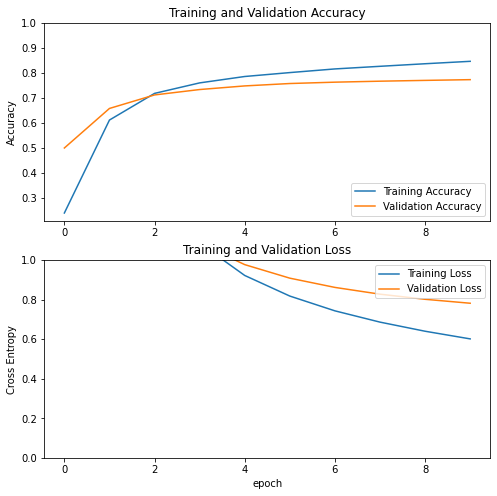

In [39]:
initial_epochs = 10
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()




In [40]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

64/64 [==============================] - 1008s 14s/step - loss: 0.7817 - accuracy: 0.7816
Test accuracy : 0.7816035151481628


In [41]:
fold = []
for folders in os.listdir('/content/drive/MyDrive/Colab Notebooks/train'):
    fold.append(folders)

print(fold)

['australian_shepherd', 'scottish_deerhound', 'schipperke', 'black_and_tan_coonhound', 'gordon_setter', 'shih_tzu', 'shetland_sheepdog', 'fila braziliero', 'groenendael', 'bluetick', 'greater_swiss_mountain_dog', 'cane_carso', 'tibetan_mastiff', 'pembroke', 'bernese_mountain_dog', 'chihuahua', 'french_bulldog', 'toy_poodle', 'appenzeller', 'mexican_hairless', 'rottweiler', 'dingo', 'briard', 'great_dane', 'siberian_husky', 'lakeland_terrier', 'wire_haired_fox_terrier', 'old_english_sheepdog', 'bouvier_des_flandres', 'lhasa', 'bedlington_terrier', 'curly_coated_retriever', 'english_setter', 'kuvasz', 'cardigan', 'english_foxhound', 'kelpie', 'miniature_schnauzer', 'newfoundland', 'flat_coated_retriever', 'italian_greyhound', 'brabancon_griffo', 'saint_bernard', 'black_sable', 'eskimo_dog', 'dandie_dinmont', 'saluki', 'maltese_dog', 'soft_coated_wheaten_terrier', 'american_staffordshire_terrier', 'blenheim_spaniel', 'teddy', 'silky_terrier', 'keeshond', 'bichon_frise', 'dhole', 'cairn', 

In [42]:
class_names = fold 
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)
#print(predictions.shape)

# Apply a softmax instead of sigmoid
predictions = tf.nn.softmax(predictions)

#https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
#predicted_class_index = np.argmax(predictions, axis=1)
#print("Predicted class:", class_names[predicted_class_index[0]])


# Get the index of the top 5 predictions (the predicted classes)
top_5_predictions = np.argsort(predictions, axis=1)[0][-5:]

# print the predicted classes
print("Predicted classes:")
for i in top_5_predictions:
    print(class_names[i])

#print(predictions.shape)


Predicted classes:
great_dane
scottish_deerhound
bull_mastiff
chow
walker_hound
